# Background
The Streer View HOuse Numbers (SVHN) dataset is used in neural networks created by Google to read house numbers and match them to their geolocations. In this project we will use a dataset with images centered around a single digit, many of them contain distractors at the side. Though we are taking a sample of simple dataset, however, they are more complex than MNIST because of the distractors. 

# Objective
-Our main objective is to build Neural Network model that can identify house numbers in an image.

# Dataset:
The dataset has the following features:
Number of classes: 10
Training data: 42000 images
Testing data: 18000 images
However we will only use 2000 samples from the dataset for easier handling. 

In [106]:
#Importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import h5py
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from keras.utils.np_utils import to_categorical 
from keras.utils import np_utils
from keras.layers import Activation, Dense
from keras.layers  import BatchNormalization, Dropout
from keras import optimizers

In [129]:
#loading the datafile using h5py peckage
hf4=h5py.File("C:\\Users\\HP\\Downloads\\SVHN_single_grey1.h5", "r")

In [130]:
#Checking the keys in dataset
hf4.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [131]:
#loading the train, test and validation from dataset
X_train=hf4["X_train"]
X_test=hf4["X_test"]
X_val=hf4["X_val"]
y_train=hf4["y_train"]
y_test=hf4["y_test"]
y_val=hf4["y_val"]

In [132]:
# Printing the shape and data type
print("Training data X Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data yShape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X Shape : (42000, 32, 32) and Data Type :  float32
Testing data X Shape : (18000, 32, 32) and Data Type :  float32
Validation data X Shape : (60000, 32, 32) and Data Type :  float32
Training data y Shape : (42000,) and Data Type :  uint8
Testing data y Shape : (18000,) and Data Type :  uint8
Validation data yShape : (60000,) and Data Type :  uint8


- there are 42000 samples in training, 60000 samples in validation and 18000 in testing in original datasets
- image size are 32x32

In [134]:
#fixing random seed for reproducibility
seed = 7
np.random.seed(seed)

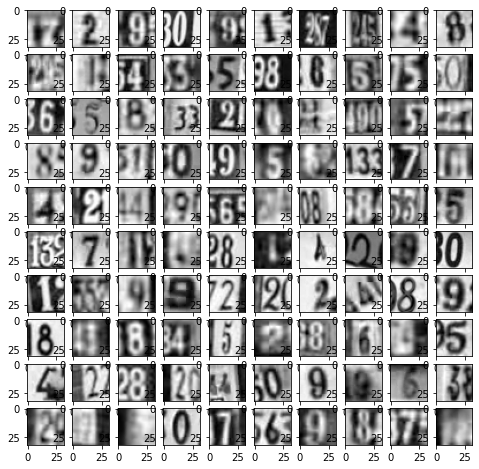

In [135]:
#Visualizing the dataset
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

- from the above image, we see the images are strongly distracted.

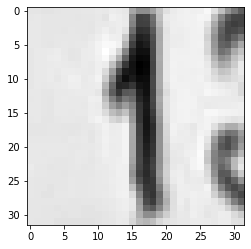

Label:  1


In [136]:
# show the number in the dataset
plt.imshow(X_train[12],cmap='gray')    
plt.show()
print('Label: ', y_train[12])

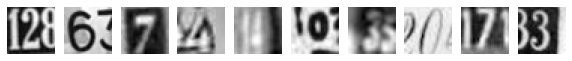

label for each of image: [2 6 7 4 4 0 3 0 7 3]


In [137]:
# visualizing the first 10 images in the dataset with label
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of image: %s' % (y_train[0:10]))

In [138]:
# reshaping the data
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

In [139]:
# normalize inputs from 0-255 to 0-1; to be used with the NN
X_train = X_train / 255.0
X_test = X_test / 255.0

In [140]:
#Converting output label to multiple values
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [141]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


# Reducing the dataset to 2000 Samples for easier handling

In [142]:
x_tr = []
for i in range(42000):
    x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(18000):
    x_te.append(X_test[i,:].flatten())
x_val = []
for i in range(60000):
    x_val.append(X_val[i,:].flatten())

In [143]:
# 2000 samples to be used in Neural Network modelling    
x_tr =x_tr[:2000]
x_te =x_te[:2000]
x_val =x_val[:2000]
y_tr = y_train[0:2000]
y_te = y_test[0:2000]
y_val = y_val[0:2000]

In [144]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(x_tr).reshape(2000,1024)
X_test = np.asarray(x_te).reshape(2000,1024)
X_val = np.asarray(x_val).reshape(2000,1024)

# Initiating Artificial Neural Network Model

In [145]:
#Initializing the Artificial Neural Network Classifier
kr_model = Sequential()

In [146]:
#Input layer - Adding Input layer and activation functions ReLU
kr_model.add(Dense(512, kernel_initializer="he_normal", input_shape=(1024, )))
kr_model.add(Activation("relu"))

#Adding first Hidden layer and activation function
kr_model.add(Dense(256, kernel_initializer='he_normal'))
kr_model.add(Activation('relu'))

#Adding second Hidden layer and activation function
kr_model.add(Dense(128, kernel_initializer='he_normal'))
kr_model.add(Activation('relu'))

#Adding third Hidden layer and activation function
kr_model.add(Dense(64, kernel_initializer="he_normal"))
kr_model.add(Activation("relu"))

#Adding fourth Hidden layer and activation function
kr_model.add(Dense(32, kernel_initializer="he_normal"))
kr_model.add(Activation("relu"))

#Adding output layer and activation function
kr_model.add(Dense(10))
kr_model.add(Activation('softmax'))

- input shape for the image is 32x32 = 1024
- Here the model has 4 hidden layers
- As activation Relu is used
- in the output layer Softmax activation is used, as for the multiclass classification softmax is used

In [147]:
kr_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 512)               524800    
                                                                 
 activation_36 (Activation)  (None, 512)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 activation_37 (Activation)  (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                                 
 activation_38 (Activation)  (None, 128)               0         
                                                                 
 dense_39 (Dense)            (None, 64)               

- The total number of parameters will be used in the model 699,690 

# - Using Adam Optimizer

In [148]:
# compiling the ANN classifier using Adam optimizer and taking categorical_crossentrophy as loss function and metrics used accuracy
kr_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [149]:
# Fitting the ANN to the Training data , batch size used 200 and 10 epochs
history = kr_model.fit(X_train, y_tr, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
10/10 [==============================] - 8s 169ms/step - loss: 2.3547 - accuracy: 0.0945 - val_loss: 154.4253 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 1s 69ms/step - loss: 2.3144 - accuracy: 0.1100 - val_loss: 110.0839 - val_accuracy: 0.0015
Epoch 3/10
10/10 [==============================] - 0s 50ms/step - loss: 2.3129 - accuracy: 0.1020 - val_loss: 48.3003 - val_accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 0s 34ms/step - loss: 2.3061 - accuracy: 0.1070 - val_loss: 72.8019 - val_accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 0s 45ms/step - loss: 2.3031 - accuracy: 0.0955 - val_loss: 55.0254 - val_accuracy: 5.0000e-04
Epoch 6/10
10/10 [==============================] - 0s 38ms/step - loss: 2.3052 - accuracy: 0.1055 - val_loss: 0.6944 - val_accuracy: 0.8525
Epoch 7/10
10/10 [==============================] - 0s 34ms/step - loss: 2.3033 - accuracy: 0.1065 - val_loss: 60.1230 - val_accur

In [150]:
results = kr_model.evaluate(X_val, y_val)
print('Val_acc using simple NN adam : ', results[1])

63/63 [==============================] - 1s 9ms/step - loss: 0.9064 - accuracy: 0.9230
Val_acc using simple NN adam :  0.9229999780654907


- By using adam optimizer, model shows very good accuracy level on validation data, this is around 92 percent

# Using SGD Optimizer

In [187]:
# compiling the ANN classifier using sgd optimizer
kr_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [188]:
# Fitting the ANN to the Training data
history = kr_model.fit(X_train, y_tr, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
10/10 [==============================] - 1s 68ms/step - loss: 2.2527 - accuracy: 0.1665 - val_loss: 32.4138 - val_accuracy: 0.3975
Epoch 2/10
10/10 [==============================] - 0s 35ms/step - loss: 2.2515 - accuracy: 0.1825 - val_loss: 13.5627 - val_accuracy: 0.6905
Epoch 3/10
10/10 [==============================] - 0s 34ms/step - loss: 2.2519 - accuracy: 0.1780 - val_loss: 17.0197 - val_accuracy: 0.6375
Epoch 4/10
10/10 [==============================] - 0s 34ms/step - loss: 2.2486 - accuracy: 0.1840 - val_loss: 5.5142 - val_accuracy: 0.8395
Epoch 5/10
10/10 [==============================] - 0s 35ms/step - loss: 2.2467 - accuracy: 0.1775 - val_loss: 10.9658 - val_accuracy: 0.7800
Epoch 6/10
10/10 [==============================] - 0s 35ms/step - loss: 2.2444 - accuracy: 0.1715 - val_loss: 31.5423 - val_accuracy: 0.5375
Epoch 7/10
10/10 [==============================] - 0s 31ms/step - loss: 2.2406 - accuracy: 0.1790 - val_loss: 24.1016 - val_accuracy: 0.6255
Epoch 8

In [189]:
results = kr_model.evaluate(X_val, y_val)
print("Val_acc using sgd :", results[1])

63/63 [==============================] - 1s 7ms/step - loss: 13.6664 - accuracy: 0.7495
Val_acc using sgd : 0.7494999766349792


- Here we see Adam optimizer is doing better than SGD 92 percent (Adam) and 74 percent (SGD)

# Using learning rate in Adam optimizer

In [190]:
from tensorflow  import keras

In [191]:
#Setting the learning rate 0.0001
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
kr_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = kr_model.fit(X_train, y_tr, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
10/10 [==============================] - 2s 68ms/step - loss: 2.2412 - accuracy: 0.1655 - val_loss: 44.5573 - val_accuracy: 0.4525
Epoch 2/10
10/10 [==============================] - 0s 33ms/step - loss: 2.2343 - accuracy: 0.1750 - val_loss: 25.7484 - val_accuracy: 0.6255
Epoch 3/10
10/10 [==============================] - 0s 37ms/step - loss: 2.2301 - accuracy: 0.1865 - val_loss: 16.4450 - val_accuracy: 0.7140
Epoch 4/10
10/10 [==============================] - 0s 36ms/step - loss: 2.2270 - accuracy: 0.1830 - val_loss: 13.9730 - val_accuracy: 0.7550
Epoch 5/10
10/10 [==============================] - 0s 36ms/step - loss: 2.2237 - accuracy: 0.1930 - val_loss: 13.5919 - val_accuracy: 0.7645
Epoch 6/10
10/10 [==============================] - 0s 36ms/step - loss: 2.2173 - accuracy: 0.1840 - val_loss: 23.5435 - val_accuracy: 0.6580
Epoch 7/10
10/10 [==============================] - 0s 33ms/step - loss: 2.2131 - accuracy: 0.1880 - val_loss: 45.8598 - val_accuracy: 0.4750
Epoch 

In [192]:
results = kr_model.evaluate(X_val, y_val)
print('Val_acc using adam and adding learning rate : ', results[1])

63/63 [==============================] - 1s 6ms/step - loss: 48.2760 - accuracy: 0.4725
Val_acc using adam and adding learning rate :  0.4724999964237213


- Using the learnig rate the accuracy has not improved, rather it has decreased

In [193]:
#Setting the learning rate 0.0001 and trying with 5 epochs
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
kr_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = kr_model.fit(X_train, y_tr, validation_data=(X_val,y_val),batch_size = 200, epochs = 5, verbose = 1)

Epoch 1/5
10/10 [==============================] - 2s 92ms/step - loss: 2.1991 - accuracy: 0.2045 - val_loss: 23.5755 - val_accuracy: 0.6695
Epoch 2/5
10/10 [==============================] - 0s 36ms/step - loss: 2.1938 - accuracy: 0.2060 - val_loss: 51.1583 - val_accuracy: 0.4725
Epoch 3/5
10/10 [==============================] - 0s 35ms/step - loss: 2.1912 - accuracy: 0.2115 - val_loss: 53.2019 - val_accuracy: 0.4625
Epoch 4/5
10/10 [==============================] - 0s 35ms/step - loss: 2.1824 - accuracy: 0.2220 - val_loss: 16.8695 - val_accuracy: 0.7180
Epoch 5/5
10/10 [==============================] - 0s 34ms/step - loss: 2.1772 - accuracy: 0.2205 - val_loss: 19.5982 - val_accuracy: 0.6900


In [194]:
results = kr_model.evaluate(X_val, y_val)
print('Val_acc using adam with learning rate and 5 epoch : ', results[1])

63/63 [==============================] - 1s 7ms/step - loss: 19.5982 - accuracy: 0.6900
Val_acc using adam with learning rate and 5 epoch :  0.6899999976158142


- Here we see  a little bit better performance with 5 epoch than 10 epoch, however it is less than without learning rate
- From all tried different models, we find using adam optimizer without learning rate has the best accuracy level so far

# Implementing Batch normalization

In [195]:
kr_model1=Sequential()

In [196]:
#Input layer - Adding Input layer and activation functions ReLU and adding a batch normalization layer
kr_model1.add(Dense(512, kernel_initializer="he_normal", input_shape=(1024, )))
kr_model1.add(BatchNormalization())
kr_model1.add(Activation("relu"))

#Adding first Hidden layer and activation function
kr_model1.add(Dense(256, kernel_initializer='he_normal'))
kr_model1.add(BatchNormalization())
kr_model1.add(Activation('relu'))

#Adding second Hidden layer and activation function
kr_model1.add(Dense(128, kernel_initializer='he_normal'))
kr_model1.add(BatchNormalization())
kr_model1.add(Activation('relu'))

#Adding third Hidden layer and activation function
kr_model1.add(Dense(64, kernel_initializer="he_normal"))
kr_model1.add(BatchNormalization())
kr_model1.add(Activation("relu"))

#Adding fourth Hidden layer and activation function
kr_model1.add(Dense(32, kernel_initializer="he_normal"))
kr_model1.add(BatchNormalization())
kr_model1.add(Activation("relu"))

#Adding output layer and activation function
kr_model1.add(Dense(10))
kr_model1.add(Activation('softmax'))

In [164]:
kr_model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_13 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_42 (Activation)  (None, 512)               0         
                                                                 
 dense_43 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_14 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_43 (Activation)  (None, 256)              

- We have added Batch normalization layer to make our neural netowrk more faster and stable
- there we will have 703,658 parameters in total

In [197]:
# compiling the ANN classifier using Adam optimizer and taking categorical_crossentrophy as loss function and metrics used accuracy
kr_model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [204]:
history_1 = kr_model1.fit(X_train, y_tr, validation_data=(X_val,y_val),batch_size = 200, epochs = 50, verbose = 1)

Epoch 1/50
10/10 [==============================] - 0s 52ms/step - loss: 0.0353 - accuracy: 0.9975 - val_loss: 784.0069 - val_accuracy: 0.0925
Epoch 2/50
10/10 [==============================] - 0s 46ms/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 1005.7598 - val_accuracy: 0.0320
Epoch 3/50
10/10 [==============================] - 0s 46ms/step - loss: 0.0356 - accuracy: 0.9970 - val_loss: 617.6312 - val_accuracy: 0.1070
Epoch 4/50
10/10 [==============================] - 0s 46ms/step - loss: 0.0347 - accuracy: 0.9975 - val_loss: 436.6497 - val_accuracy: 0.1085
Epoch 5/50
10/10 [==============================] - 0s 42ms/step - loss: 0.0429 - accuracy: 0.9955 - val_loss: 1457.8563 - val_accuracy: 0.0030
Epoch 6/50
10/10 [==============================] - 0s 46ms/step - loss: 0.0642 - accuracy: 0.9905 - val_loss: 1321.4240 - val_accuracy: 0.0600
Epoch 7/50
10/10 [==============================] - 0s 46ms/step - loss: 0.0588 - accuracy: 0.9955 - val_loss: 774.2675 - val_accuracy: 0.0

In [205]:
results = kr_model1.evaluate(X_val, y_val)
print('Val_acc adding Batch_normalization layer : ', results[1])

63/63 [==============================] - 0s 7ms/step - loss: 1806.2047 - accuracy: 0.0200
Val_acc adding Batch_normalization layer :  0.019999999552965164


- Here using batch optimization layer, accuracy is very poor

# - Adding learning rate with batch normalization

In [206]:
#Setting the learning rate 0.0001
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
kr_model1.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_1 = kr_model1.fit(X_train, y_tr, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
10/10 [==============================] - 3s 89ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 1559.1278 - val_accuracy: 0.0460
Epoch 2/10
10/10 [==============================] - 0s 47ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1580.0524 - val_accuracy: 0.0270
Epoch 3/10
10/10 [==============================] - 0s 44ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1702.0231 - val_accuracy: 0.0305
Epoch 4/10
10/10 [==============================] - 0s 46ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1658.7692 - val_accuracy: 0.0330
Epoch 5/10
10/10 [==============================] - 0s 43ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1696.9214 - val_accuracy: 0.0310
Epoch 6/10
10/10 [==============================] - 0s 46ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1599.8767 - val_accuracy: 0.0365
Epoch 7/10
10/10 [==============================] - 0s 46ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1504.5326 - val_accuracy:

In [207]:
results = kr_model1.evaluate(X_val, y_val)
print('Val_acc using learning_rate in batch normalization : ', results[1])

63/63 [==============================] - 1s 7ms/step - loss: 1505.3074 - accuracy: 0.0295
Val_acc using learning_rate in batch normalization :  0.029500000178813934


- Here also the same, no imrovement using learning rate with batch normalization

# Adding Droput Layer

In [214]:
kr_model2=Sequential()

In [215]:
#Input layer - Adding Input layer and activation functions ReLU and adding a batch normalization layer
kr_model2.add(Dense(512, kernel_initializer="he_normal", input_shape=(1024, )))
kr_model2.add(Activation("relu"))
kr_model2.add(Dropout(0.5))

#Adding first Hidden layer and activation function
kr_model2.add(Dense(256, kernel_initializer='he_normal'))
kr_model2.add(Activation('relu'))
kr_model2.add(Dropout(0.5))

#Adding second Hidden layer and activation function
kr_model2.add(Dense(128, kernel_initializer='he_normal'))
kr_model2.add(Activation('relu'))
kr_model2.add(Dropout(0.5))

#Adding third Hidden layer and activation function
kr_model2.add(Dense(64, kernel_initializer="he_normal"))
kr_model2.add(Activation("relu"))
kr_model2.add(Dropout(0.5))

#Adding fourth Hidden layer and activation function
kr_model2.add(Dense(32, kernel_initializer="he_normal"))
kr_model2.add(Activation("relu"))
kr_model2.add(Dropout(0.5))

#Adding output layer and activation function
kr_model2.add(Dense(10))
kr_model2.add(Activation('softmax'))

In [221]:
kr_model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 512)               524800    
                                                                 
 activation_72 (Activation)  (None, 512)               0         
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_73 (Dense)            (None, 256)               131328    
                                                                 
 activation_73 (Activation)  (None, 256)               0         
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_74 (Dense)            (None, 128)             

- We will use total 699,690 paramters under this model

In [216]:
kr_model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [217]:
history_2 = kr_model2.fit(X_train, y_tr, validation_data=(X_val,y_val),batch_size = 200, epochs = 20, verbose = 1)

Epoch 1/20
10/10 [==============================] - 2s 73ms/step - loss: 3.2535 - accuracy: 0.0995 - val_loss: 4.4119 - val_accuracy: 0.1745
Epoch 2/20
10/10 [==============================] - 0s 45ms/step - loss: 2.3976 - accuracy: 0.0905 - val_loss: 0.7603 - val_accuracy: 0.7790
Epoch 3/20
10/10 [==============================] - 0s 43ms/step - loss: 2.3368 - accuracy: 0.0965 - val_loss: 0.9869 - val_accuracy: 0.6980
Epoch 4/20
10/10 [==============================] - 1s 56ms/step - loss: 2.3112 - accuracy: 0.0950 - val_loss: 3.3380 - val_accuracy: 0.1175
Epoch 5/20
10/10 [==============================] - 0s 44ms/step - loss: 2.3065 - accuracy: 0.1090 - val_loss: 2.0965 - val_accuracy: 0.2070
Epoch 6/20
10/10 [==============================] - 0s 38ms/step - loss: 2.3014 - accuracy: 0.1190 - val_loss: 2.7487 - val_accuracy: 0.1800
Epoch 7/20
10/10 [==============================] - 0s 39ms/step - loss: 2.3124 - accuracy: 0.0960 - val_loss: 5.0980 - val_accuracy: 0.0190
Epoch 8/20
10

In [218]:
results = kr_model2.evaluate(X_val, y_val)
print('Val_acc using  dropout : ', results[1])

63/63 [==============================] - 1s 7ms/step - loss: 2.1163 - accuracy: 0.1030
Val_acc using  dropout :  0.10300000011920929


- Adding dropout layer also has not improved the performence

# Model on test data

In [224]:
kr_model_fin=Sequential()

In [225]:
#Input layer - Adding Input layer and activation functions ReLU and adding a batch normalization layer
kr_model_fin.add(Dense(512, kernel_initializer="he_normal", input_shape=(1024, )))
kr_model_fin.add(Activation("relu"))

#Adding first Hidden layer and activation function
kr_model_fin.add(Dense(256, kernel_initializer='he_normal'))
kr_model_fin.add(Activation('relu'))

#Adding second Hidden layer and activation function
kr_model_fin.add(Dense(128, kernel_initializer='he_normal'))
kr_model_fin.add(Activation('relu'))

#Adding third Hidden layer and activation function
kr_model_fin.add(Dense(64, kernel_initializer="he_normal"))
kr_model_fin.add(Activation("relu"))

#Adding fourth Hidden layer and activation function
kr_model_fin.add(Dense(32, kernel_initializer="he_normal"))
kr_model_fin.add(Activation("relu"))

#Adding output layer and activation function
kr_model_fin.add(Dense(10))
kr_model_fin.add(Activation('softmax'))

In [226]:
kr_model_fin.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 512)               524800    
                                                                 
 activation_90 (Activation)  (None, 512)               0         
                                                                 
 dense_91 (Dense)            (None, 256)               131328    
                                                                 
 activation_91 (Activation)  (None, 256)               0         
                                                                 
 dense_92 (Dense)            (None, 128)               32896     
                                                                 
 activation_92 (Activation)  (None, 128)               0         
                                                                 
 dense_93 (Dense)            (None, 64)              

In [234]:
kr_model_fin.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [235]:
history_5 = kr_model_fin.fit(X_train, y_tr, validation_data=(X_test,y_te),batch_size = 200, epochs = 20, verbose = 1)

Epoch 1/20
10/10 [==============================] - 2s 69ms/step - loss: 1.4096 - accuracy: 0.6365 - val_loss: 1.5059 - val_accuracy: 0.5750
Epoch 2/20
10/10 [==============================] - 0s 39ms/step - loss: 0.6887 - accuracy: 0.7630 - val_loss: 1.5023 - val_accuracy: 0.5915
Epoch 3/20
10/10 [==============================] - 0s 38ms/step - loss: 0.4303 - accuracy: 0.8600 - val_loss: 1.3673 - val_accuracy: 0.6535
Epoch 4/20
10/10 [==============================] - 0s 40ms/step - loss: 0.3144 - accuracy: 0.9065 - val_loss: 1.4162 - val_accuracy: 0.6475
Epoch 5/20
10/10 [==============================] - 0s 36ms/step - loss: 0.2602 - accuracy: 0.9295 - val_loss: 1.4348 - val_accuracy: 0.6580
Epoch 6/20
10/10 [==============================] - 0s 35ms/step - loss: 0.2314 - accuracy: 0.9415 - val_loss: 1.4630 - val_accuracy: 0.6535
Epoch 7/20
10/10 [==============================] - 0s 38ms/step - loss: 0.2147 - accuracy: 0.9445 - val_loss: 1.4759 - val_accuracy: 0.6570
Epoch 8/20
10

In [236]:
results = kr_model_fin.evaluate(X_test, y_te)
print('Test_acc using batch normalization and dropout : ', results[1])

63/63 [==============================] - 1s 7ms/step - loss: 1.6521 - accuracy: 0.6555
Test_acc using batch normalization and dropout :  0.6554999947547913


#### - On the test data model accuracy with 65 percent
- as the model with batch normalization and dropout has performed very poorly, we have tried the model on test data only using adam optimizer

# Predicting a few numbers using the final model on test data

Was predicted  0
Was labeled  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Predicted Probabilities:  [[9.9944955e-01 4.2818133e-08 5.9630949e-08 1.4517821e-06 2.8025813e-04
  1.4269105e-07 2.6462894e-04 2.2305005e-07 1.4939488e-08 3.5927083e-06]]


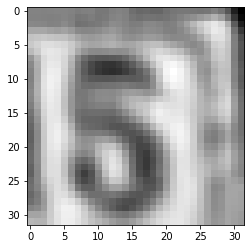

In [238]:
image_index = [18]
plt.imshow(X_test[image_index].reshape(32, 32),cmap='Greys')
pred = kr_model_fin.predict(X_test[image_index])
print("Was predicted ",pred.argmax())
print("Was labeled ",y_te[image_index])
print("Predicted Probabilities: ",pred)

- the modle has predicted wrongly, as it look like 5

Was predicted  0
Was labeled  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Probabilities:  [[7.4646521e-01 4.2087790e-06 5.2980636e-03 3.2222318e-03 8.6028170e-04
  9.5073888e-03 2.3500142e-03 3.0053298e-03 4.1228752e-03 2.2516438e-01]]


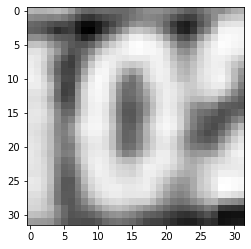

In [241]:
image_index = [123]
plt.imshow(X_test[image_index].reshape(32, 32),cmap='Greys')
pred = kr_model_fin.predict(X_test[image_index])
print("Was predicted ",pred.argmax())
print("Was labeled ",y_te[image_index])
print("Predicted Probabilities: ",pred)

- the model has done correct prediction on test data here

Was predicted  6
Was labeled  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Predicted Probabilities:  [[6.0908305e-06 1.6689464e-06 1.0866082e-06 9.6343365e-07 1.5816796e-06
  4.7529215e-06 9.9996567e-01 2.8848165e-08 1.8124632e-05 8.6022766e-08]]


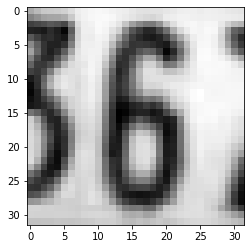

In [184]:
image_index = [21]
plt.imshow(X_test[image_index].reshape(32, 32),cmap='Greys')
pred = kr_model_fin.predict(X_test[image_index])
print("Was predicted ",pred.argmax())
print("Was labeled ",y_te[image_index])
print("Predicted Probabilities: ",pred)

- the model has done correct prediction

Was predicted  9
Was labeled  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Predicted Probabilities:  [[1.4099648e-04 3.5937126e-06 1.7611623e-04 2.7268219e-05 2.0154086e-05
  7.3702972e-06 2.8892161e-06 1.3521984e-06 3.7047532e-06 9.9961650e-01]]


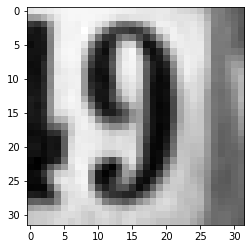

In [185]:
image_index = [35]
plt.imshow(X_test[image_index].reshape(32, 32),cmap='Greys')
pred = kr_model_fin.predict(X_test[image_index])
print("Was predicted ",pred.argmax())
print("Was labeled ",y_te[image_index])
print("Predicted Probabilities: ",pred)

- The model has done right prediction

Was predicted  1
Was labeled  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Probabilities:  [[3.4491426e-05 9.9985838e-01 1.2650795e-05 1.5188231e-06 8.8989937e-06
  1.9439505e-05 7.3236907e-07 5.1087347e-05 4.4597668e-06 8.4249796e-06]]


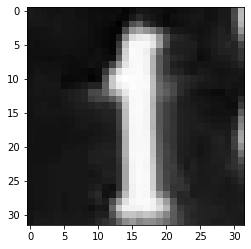

In [186]:
image_index = [110]
plt.imshow(X_test[image_index].reshape(32, 32),cmap='Greys')
pred = kr_model_fin.predict(X_test[image_index])
print("Was predicted ",pred.argmax())
print("Was labeled ",y_te[image_index])
print("Predicted Probabilities: ",pred)

- the model has done also here the correct prediction

# Conclusion and Recommendation
- The datas are largely distracted, it is complex data than MIST
- The model with adam optimizer without learning rate has shown the best performence on validation data around 74 percent 
- the final model on test data has shown the accuracy level of 65 percent 
- The model has not performed well in comparison of trained data, where there was accuracy level 0f 92 percent
- There can used also other neural network model, for example Convolutional neural network
- Randomely some numbers were tested whehter model can predict the data correctly, among five numbers, the model have predcted correctly. 